In [98]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [99]:
#importing the data
df = pd.read_csv(r"C:\Users\megal\Downloads\archive (1)\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

There is only 342 passenger survived 
549 passenger not survive 

In [101]:
df['Survived'].value_counts(normalize = True) *100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [102]:
df.shape

(891, 12)

In [103]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#cheching null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
#droping cabin column
df = df.drop(columns = ['Cabin'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [106]:
#calculating mean age for each gender
age = df.groupby('Sex')['Age'].mean()

#filling null values in the age column based on gender
df['Age'] = df.apply(
    lambda x:age[x['Sex']] if pd.isnull(x['Age']) else x['Age'], axis=1
)


In [ ]:
#Replacing null values with mode values.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [107]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [108]:
#label encoding for sex column
df['Sex'] = df['Sex'].map({'male':1,'female':0})

1 for male 
0 for female

In [109]:
#one-hot encoding for Embarked column
df = pd.get_dummies(df,columns=['Embarked'])

In [111]:
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [113]:
# Getting the statistical parameters
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.736034,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,13.014897,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [114]:
df1 = df.drop(columns = ['Name','Ticket'])

<Axes: >

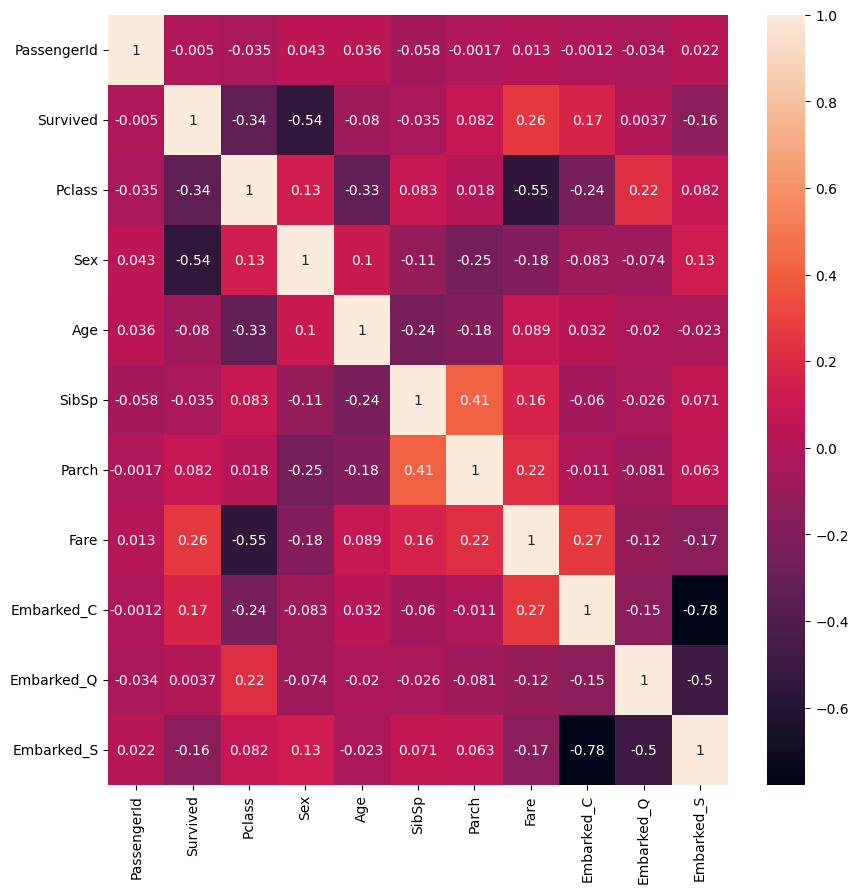

In [118]:
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(),annot=True)

In [116]:
#normalizing the numerical features
x = df.drop(['Survived','Name','Ticket'],axis = 1)

In [91]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0
2,3,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,1
4,5,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
#Standard Scaling
x = StandardScaler().fit_transform(x)
x

array([[-1.73010796,  0.82737724,  0.73769513, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.72622007, -1.56610693, -1.35557354, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [-1.72233219,  0.82737724, -1.35557354, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 1.72622007, -1.56610693,  0.73769513, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 1.73010796,  0.82737724,  0.73769513, ..., -0.48204268,
         3.25137334, -1.62380254]])

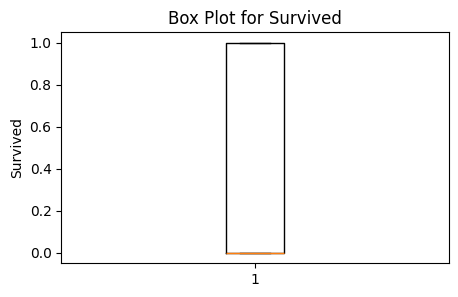

In [ ]:
#identifying the outliers in the data
plt.figure(figsize =(5,3))
plt.boxplot(df['Survived'])
plt.title("Box Plot for Survived")
plt.ylabel('Survived')
plt.show()

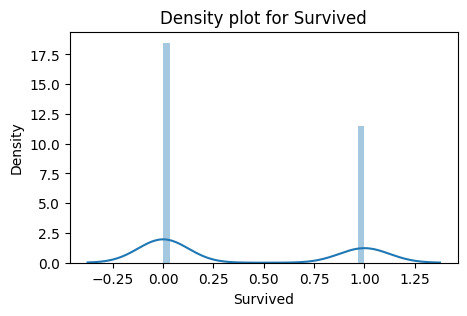

In [97]:
#identifying the outliers in the data
plt.figure(figsize = (5,3))
sns.distplot(df['Survived'],kde=True,bins = 30)
plt.title('Density plot for Survived')
plt.xlabel('Survived')
plt.ylabel('Density')
plt.show()

The above two plots indicate that there are no outliers.